In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_table("people.txt")

In [ ]:
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [ ]:
isvalidAge = (df["Age"]>=0)  &  (df["Age"]<=150)

In [ ]:
s1 = isvalidAge.shape[0]
invalid1 = s1 - isvalidAge.sum()
invalid1

1

In [ ]:
isvalidAgeMarried=(df["Age"] >= df["yearsmarried"])

In [ ]:
invalid2 = isvalidAgeMarried.count()- isvalidAgeMarried.sum()
invalid2


1

In [ ]:
isvalidStatus = (df["status"] == "single") | (df["status"]=="married") |(df["status"] == "widowed")

In [ ]:
invalid3 =isvalidStatus.count() -  isvalidStatus.sum()
invalid3

0

In [ ]:
isvalidAgegroup = (df["Age"]<18) & (df['agegroup'] == 'child') | ((df["Age"]>=18) & (df["Age"]<65)) &(df['agegroup'] =='adult') |  (df["Age"]>65) &( df['agegroup'] == 'elderly')
invalid4 = isvalidAgegroup.count() -  isvalidAgegroup.sum()
invalid4

1

In [ ]:
import matplotlib.pyplot as plt


<BarContainer object of 4 artists>

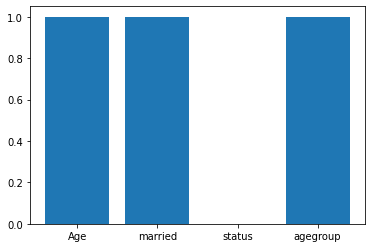

In [ ]:
x=["Age","married","status","agegroup"]
y=[invalid1,invalid2,invalid3,invalid4]
plt.bar(x,y)

In [ ]:
def ruleset(df):
    df["Rule1"]=df["Age"].apply(lambda x: True if x>0 and x<150 else False)
    df["Rule2"]=df.apply(lambda x:True if x.Age>x.yearsmarried else False,axis=1)
    df["Rule3"]=df.apply(lambda x:True if (x.status=="single")|(x.status=="married" and x.Age>18)|(x.status=="widowed" and x.Age>18) else False,axis=1)
    df['Rule4']=df.apply(lambda x: True if (x.Age<18 and x.agegroup=='child')|((x.Age>=18 and x.Age<65) and x.agegroup=='adult' ) | (x.Age>65 and x.agegroup == 'elderly') else False, axis=1)
    

In [ ]:
ruleset(df)